In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import myMLlib as lb
import pandas as pd

In [2]:
folderpath= ('/home/yuqster/files/research/dataset/autostop_new1','/home/yuqster/files/research/dataset/autostop_new2',
             '/home/yuqster/files/research/dataset/autostop_new3','/home/yuqster/files/research/dataset/autostop_new4')


materials = ['air','water']

In [3]:
data_list,labels = lb.load_data_list(folderpath,materials, 4e4)
X = np.array(data_list[0])
y = np.array(labels[0])
index = {}
unique_labels = np.unique(y)
index['air'] = np.where(y == unique_labels[0])
index['water'] = np.where(y == unique_labels[1])



In [4]:
time_file = pd.read_csv('/home/yuqster/files/research/dataset/autostop_new1/time_vector.csv',usecols=[1])
time = np.array(time_file).squeeze()
air = X[index['air']].squeeze()
water = X[index['water']].squeeze()
print(air.shape)

(16883, 4096)


In [5]:
fs = len(time)/time[-1]
print(fs)
air_mean = air.mean(axis=0)
water_mean = water.mean(axis=0)
print(air_mean.shape)
print(water_mean.shape)

13892280.558947226
(4096,)
(4096,)


In [6]:

# pick 100 freqs between 20 kHz and 200 kHz:
freqs = np.linspace(20e3, 800e3, num=600)

wavelet = pywt.ContinuousWavelet('cmor10-1.0')
# compute scales that correspond to those freqs
scales = wavelet.center_frequency * fs / freqs

# now do the transform
cwtmatr, freqs_out = pywt.cwt(
    air_mean,
    scales,
    wavelet,
    sampling_period=1/fs
)


In [7]:

# pick 100 freqs between 20 kHz and 200 kHz:
freqs = np.linspace(20e3, 800e3, num=600)

wavelet = pywt.ContinuousWavelet('cmor10-1.0')
# compute scales that correspond to those freqs
scales = wavelet.center_frequency * fs / freqs

# now do the transform
water_cwtmatr, water_freqs_out = pywt.cwt(
    water_mean,
    scales,
    wavelet,
    sampling_period=1/fs
)

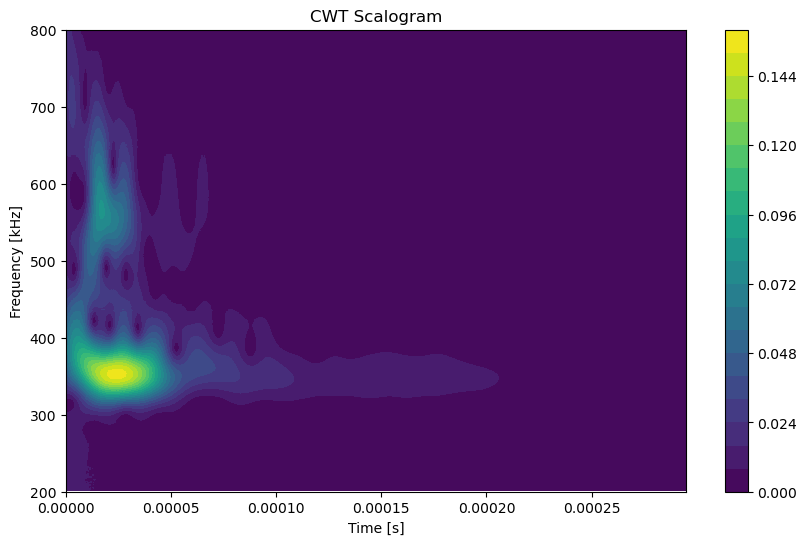

In [9]:
lb.plotCWTscalogram(time,freqs,cwtmatr,figuresize=(10,6),frerange=[200e3,800e3],contourplot=True,cmapnum=20)

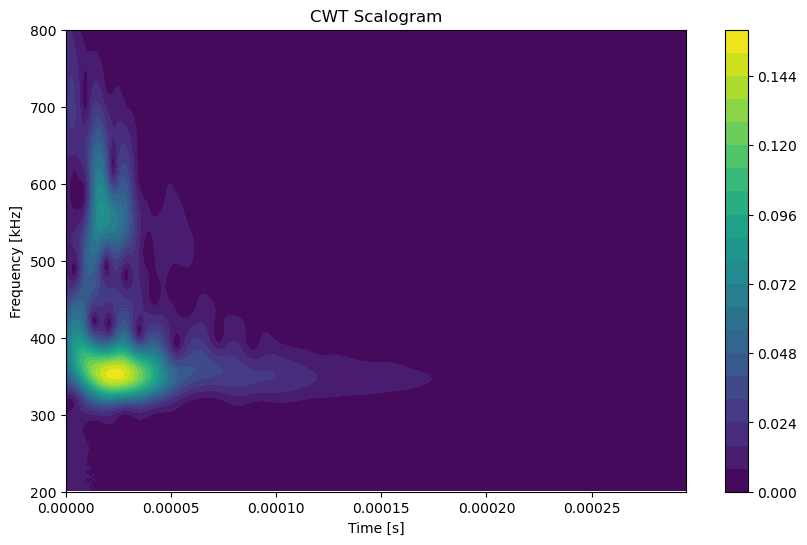

In [10]:
lb.plotCWTscalogram(time,freqs,water_cwtmatr,figuresize=(10,6),frerange=[200e3,800e3],contourplot=True,cmapnum=20)